In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")

In [5]:
df.isna()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [109]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
model_lg = LinearRegression()
X = df[['highway-mpg']]
y = df['price']
model_lg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
yhat = model_lg.predict(X)

In [11]:
model_lg.coef_
#model_lg.intercept_

array([-821.73337832])

In [12]:
#c = 38423.3058581574
#m = -821.733

#yhat = -821.733 * highway-mpg + 38423.31

lm1 = LinearRegression()
X = df[['engine-size']]
y = df['price']
lm1.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
yhat = lm1.predict(X)

In [15]:
lm1.coef_
#m = 166.86
lm1.intercept_
#c = -7963.338
#yhat = 166.86 * X - 7963.34

-7963.338906281027

In [16]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']
lm1.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
yhat = lm1.predict(X)

lm1.coef_


array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [19]:
lm1.intercept_

-15806.62462632922

In [20]:
yhat = -15806.62 + 53.49 * df['horsepower'] + 4.707 * df['curb-weight'] + 81.53 * df['engine-size'] + 36.05 * df['highway-mpg']

<Axes: xlabel='highway-mpg', ylabel='price'>

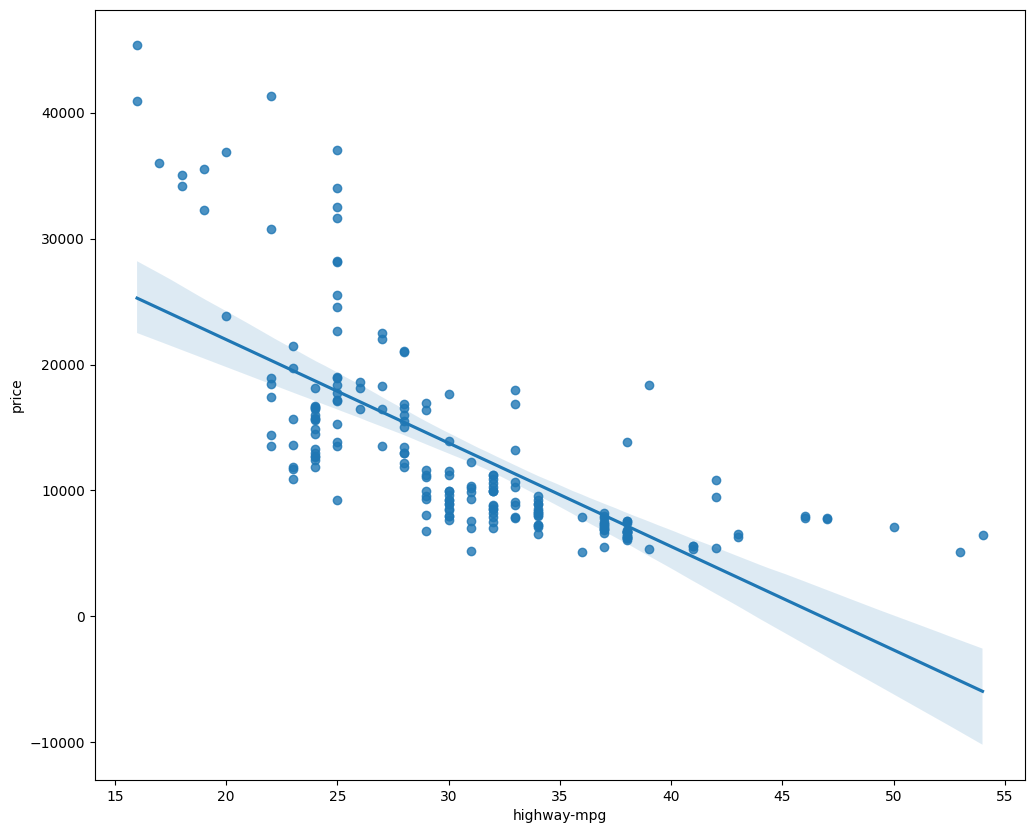

In [22]:
plt.figure(figsize=[12,10])
sns.regplot(x="highway-mpg", y="price", data=df)

(0.0, 48160.223504856636)

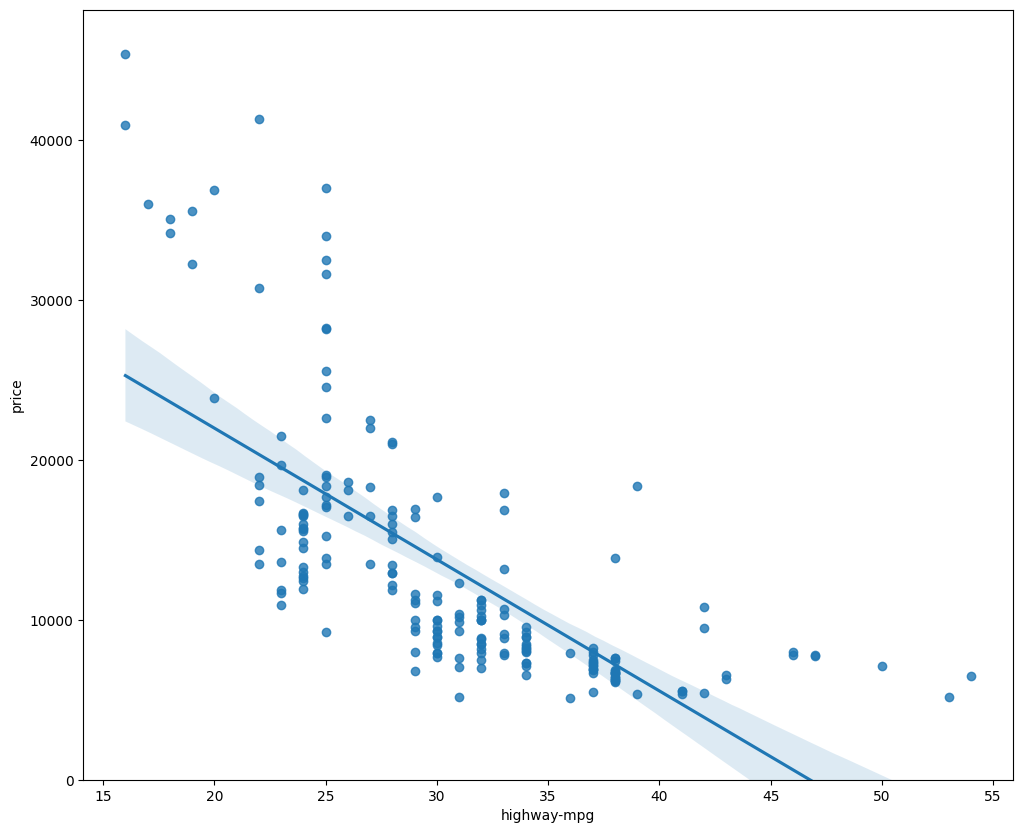

In [23]:
plt.figure(figsize=[12,10])
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

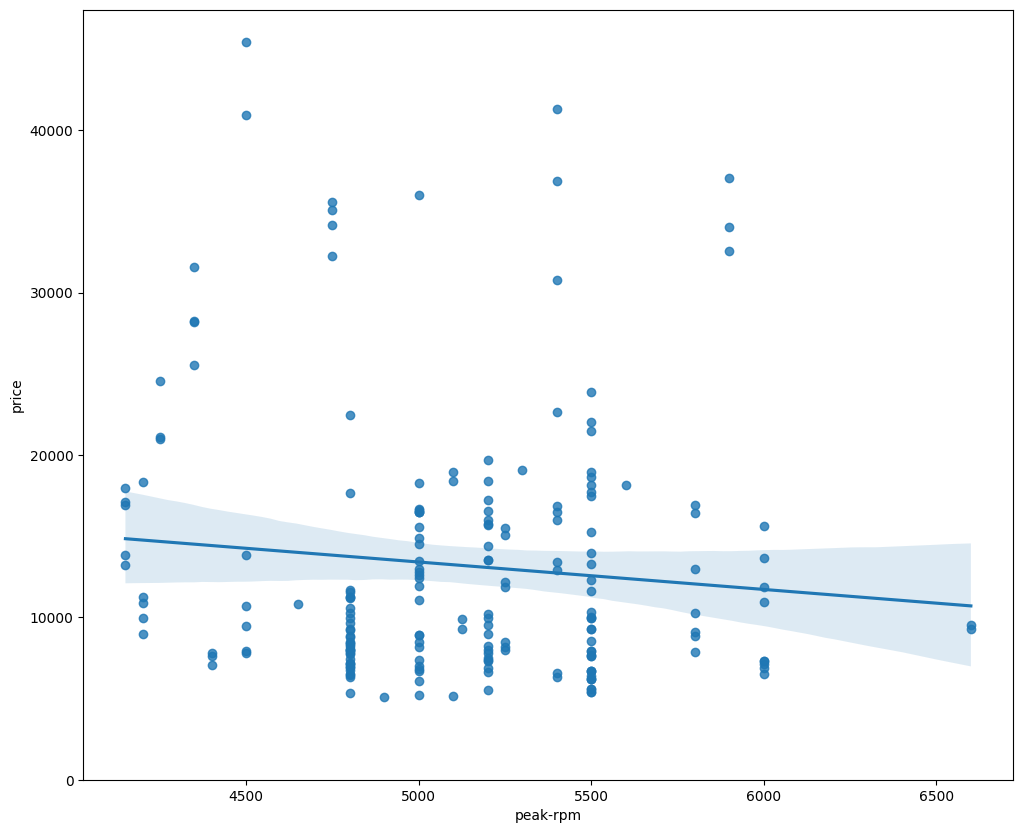

In [24]:
plt.figure(figsize=(12, 10))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

(0.0, 22450.668458176668)

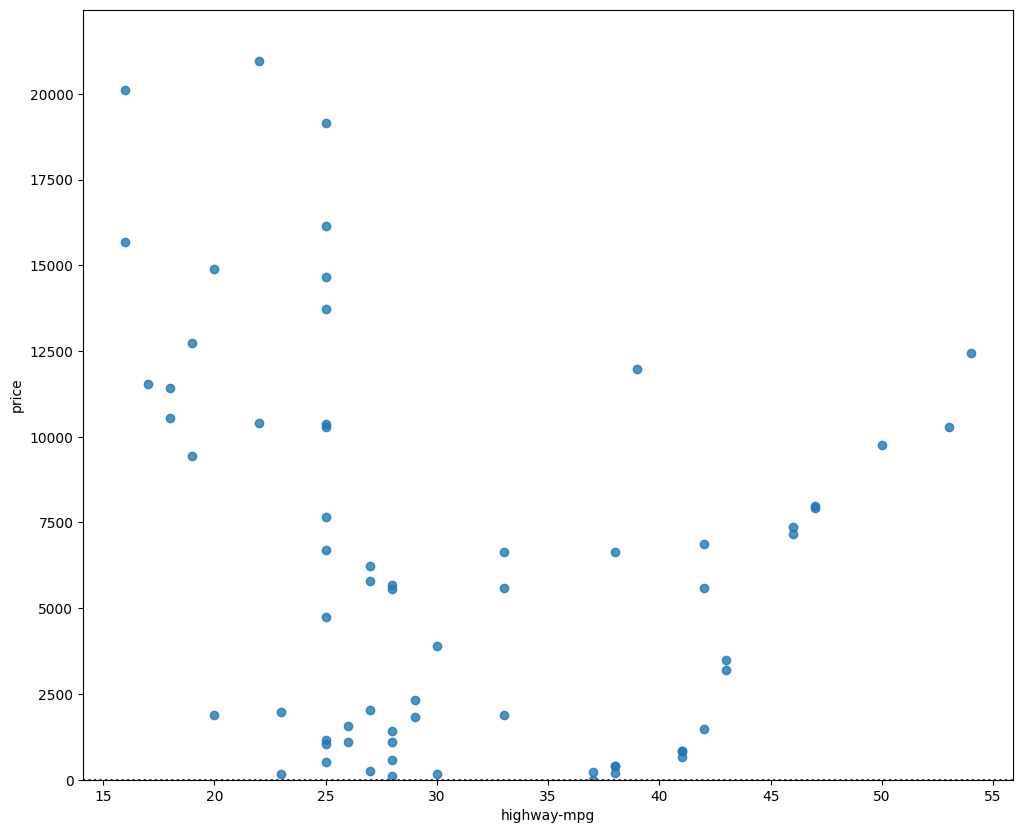

In [31]:
#df.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=[12,10])
sns.residplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [34]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']
lm = LinearRegression()
lm.fit(Z,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
yhat = lm.predict(Z)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_70745/990649824.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color='r',label="Actual Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_70745/990649824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

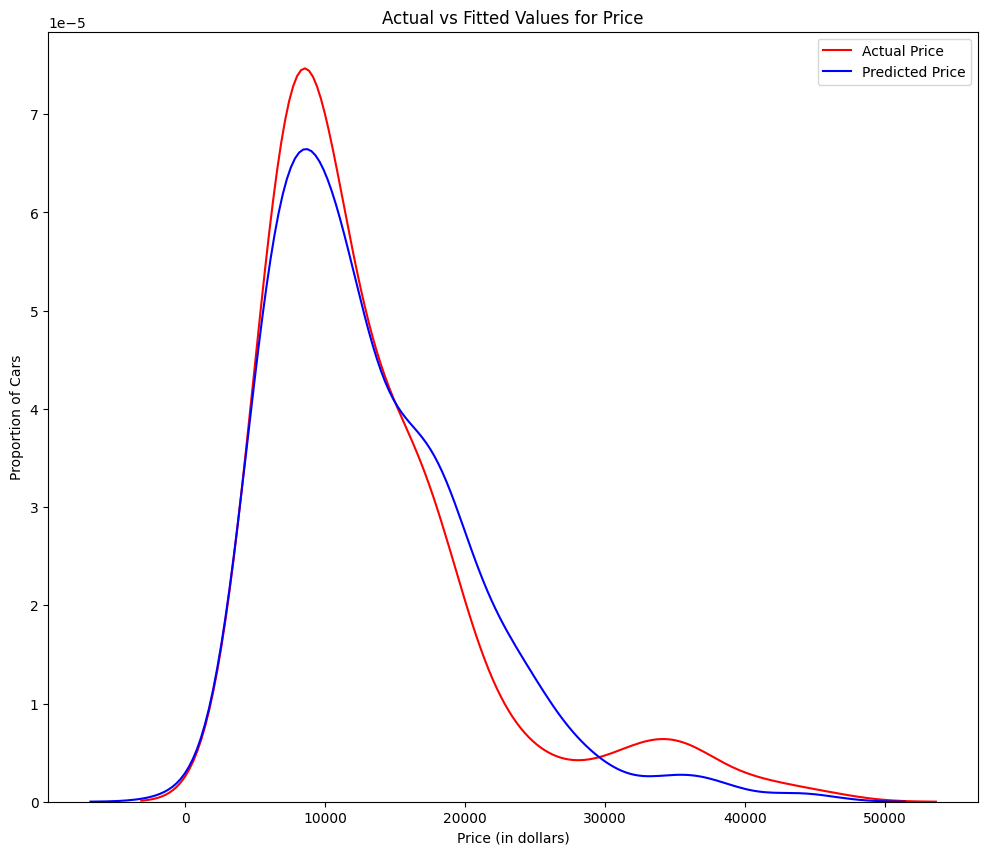

In [38]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y, hist=False, color='r',label="Actual Price")
sns.distplot(yhat, hist=False, color='b',label="Predicted Price")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
#plt.close()

In [39]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [64]:
pipe = Pipeline([
    ("scaler",StandardScaler()),
    ("poly",PolynomialFeatures(degree=5,include_bias=False)),
    ("model",LinearRegression())
])
pipe

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,5
,interaction_only,False
,include_bias,False
,order,'C'


In [65]:
Z.astype('float')
pipe.fit(Z,y)
ypipe = pipe.predict(Z)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_70745/2512035617.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color='r',label="Actual Price")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_70745/2512035617.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

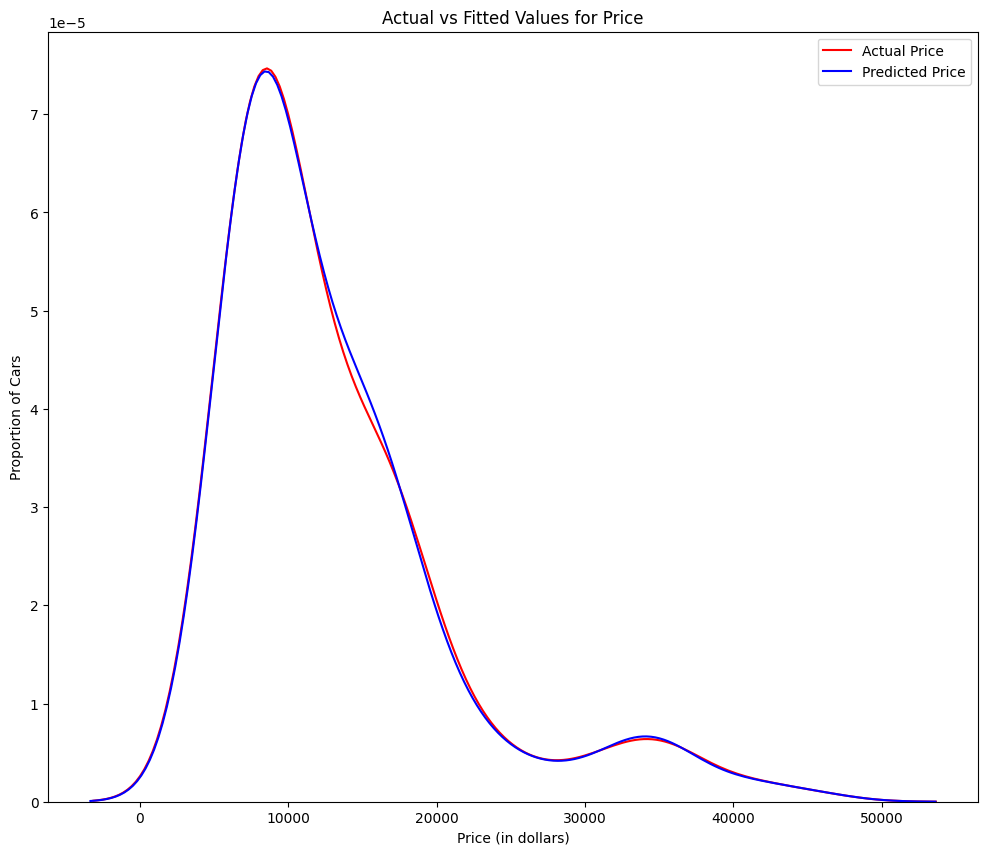

In [66]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y, hist=False, color='r',label="Actual Price")
sns.distplot(ypipe, hist=False, color='b',label="Predicted Price")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
#plt.close()

In [100]:
X = df[['highway-mpg']]
y = df['price']
lm1 = LinearRegression()
lm1.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [108]:
print ("Simple Linear Model Score : ",lm1.score(X,y))
yhat_lm1 = lm1.predict(X)
mse = mean_squared_error(y,yhat_lm1)
print ("Simple Linear Model MSE : ", mse)

Simple Linear Model Score :  0.4965911884339176
Simple Linear Model MSE :  31635042.944639888


In [102]:
lmm = LinearRegression()
lmm.fit(Z,y)
yhat_lmm = lmm.predict(Z)

In [103]:
print ("Multiple Linear Model Score : ",lmm.score(Z,y))
mse = mean_squared_error(y,yhat_lmm)
print ("Multiple Linear Model MSE : ", mse)

Multiple Linear Model Score :  0.8093562806577458
Multiple Linear Model MSE :  11980366.870726489


In [104]:
pipe.fit(Z,y)
yhat_pipe = pipe.predict(Z)
print ("Multiple Polynomial(5) Regression Score : ", pipe.score(Z,y))
mse = mean_squared_error(y,yhat_pipe)
print ("Multiple Polynomial(5) Regression MSE : ", mse)

Multiple Polynomial(5) Regression Score :  0.8463341969864728
Multiple Polynomial(5) Regression MSE :  9656613.403989598


In [113]:
pipe = Pipeline([
    ("scaler",StandardScaler()),
    ("poly",PolynomialFeatures(degree=2,include_bias=False)),
    ("model",LinearRegression())
])
pipe.fit(Z,y)
yhat_pipe2 = pipe.predict(Z)
print ("Multiple Polynomial(2) Regression Score : ", pipe.score(Z,y))
mse = mean_squared_error(y,yhat_pipe2)
print ("Multiple Polynomial(2) Regression MSE : ", mse)

Multiple Polynomial(2) Regression Score :  0.8463341969864728
Multiple Polynomial(2) Regression MSE :  9656613.403989598
